# Primes under 10,000 histogram

In [1]:
from collections import Counter
import math
import matplotlib.pyplot as plt

In [5]:
def gen_n_primes(n):
    """Generate a series of prime numbers
    
    2, 3, 5, ...., n
    
    returns a python list of primes"""
    primes = [2, 3, 5]
    possible_prime = 5
    while len(primes) < n:
        possible_prime += 2
        # We only need to check divisibility between
        #   2 and the square root of the number we're testing
        for prime in [p for p in primes[1:]
                  if p < math.ceil(math.sqrt(possible_prime))]:
            if possible_prime % prime == 0:
                break
        else:
            primes.append(possible_prime)
    return primes

In [6]:
scale = 1000  # The bin sizes we're working with for the histogram
num_primes_below_10000 = 1253 
primes = Counter([prime//scale*scale for prime in gen_n_primes(num_primes_below_10000)])

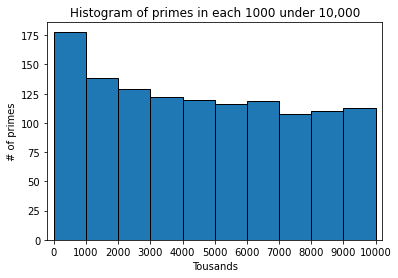

In [9]:
plt.bar(
    [x + scale//2 for x in primes.keys()],
    primes.values(),
    scale,
    edgecolor=(0,0,0))

plt.axis([min(primes.keys()) - scale//5,
          max(primes.keys()) + scale + scale//5,
          0,
          max(primes.values()) + max(primes.values())//20])
plt.xticks([scale * i for i in range(len(primes) + 1)])
plt.xlabel("Tousands")
plt.ylabel("# of primes")
plt.title("Histogram of primes in each 1000 under 10,000")
plt.show()